In [71]:
from rasa_nlu.model import Metadata, Interpreter
from rasa_nlu.training_data import load_data
from rasa_nlu import evaluate
from sklearn import preprocessing
from sklearn.metrics import classification_report
import logging

In [73]:
logger = logging.getLogger(__name__)

In [97]:
training_data = load_data('/Users/guolei/Documents/EIT/GUOLEI/ContextManager/data/rasa_training_20180503191213.json')
testing_data = load_data('/Users/guolei/Documents/EIT/GUOLEI/ContextManager/data/rasa_testing_15066_1525095686936.json')
demo_data = load_data('/Users/guolei/Documents/EIT/GUOLEI/ContextManager/data/test_data.json')
#trainer = Trainer(config.load("sample_configs/config_spacy.yml"))
#trainer.train(training_data)
#model_directory = trainer.persist('./spacy') s


/usr/local/lib/python3.6/site-packages/rasa_nlu/training_data/training_data.py:186: UserWarning: Intent 'greeting' has only 1 training examples! Minimum is 2, training may fail.
  self.MIN_EXAMPLES_PER_INTENT))


In [111]:
model_directory = '/Users/guolei/Documents/EIT/GUOLEI/Chatbot/example/spacy/default/model_20180626-105621'
interpreter = Interpreter.load(model_directory)

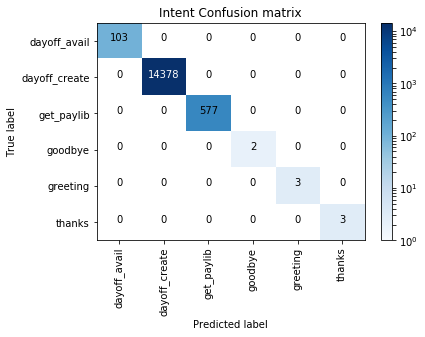

In [112]:
########## draw confusion matrix #########
#predictions = evaluate.get_intent_predictions(interpreter,testing_data)
predictions = evaluate.get_intent_predictions(interpreter,testing_data)
#targets = evaluate.get_intent_targets(testing_data)
targets = evaluate.get_intent_targets(testing_data)
#e = [e.as_dict() for e in testing_data2.intent_examples ]
#targets = [label.get("intent") for label in e]
evaluate.evaluate_intents(targets,predictions)

In [114]:
########## classification report ##############
le = preprocessing.LabelEncoder()
le.fit(targets)
target_classes = le.classes_
y_true=le.fit_transform(targets)
y_pred=le.fit_transform(predictions)
print(classification_report(y_true, y_pred, target_names=target_classes))

               precision    recall  f1-score   support

 dayoff_avail       1.00      1.00      1.00       103
dayoff_create       1.00      1.00      1.00     14378
   get_paylib       1.00      1.00      1.00       577
      goodbye       1.00      1.00      1.00         2
     greeting       1.00      1.00      1.00         3
       thanks       1.00      1.00      1.00         3

  avg / total       1.00      1.00      1.00     15066



In [113]:
report,precision,f1,accuracy = evaluate.get_evaluation_metrics(targets,predictions)
logger.info("F1-Score:  {}".format(f1))
logger.info("Precision: {}".format(precision))
logger.info("Accuracy:  {}".format(accuracy))
logger.info("Classification report: \n{}".format(report))
print("F1-Score:  {}\n".format(f1),
      "Precision: {}\n".format(precision),
      "Accuracy:  {}\n".format(accuracy),
      "Classification report: \n{}".format(report))

F1-Score:  1.0
 Precision: 1.0
 Accuracy:  1.0
 Classification report: 
               precision    recall  f1-score   support

 dayoff_avail       1.00      1.00      1.00       103
dayoff_create       1.00      1.00      1.00     14378
   get_paylib       1.00      1.00      1.00       577
      goodbye       1.00      1.00      1.00         2
     greeting       1.00      1.00      1.00         3
       thanks       1.00      1.00      1.00         3

  avg / total       1.00      1.00      1.00     15066



In [86]:
evaluate.log_evaluation_table(targets,predictions)

INFO:tensorflow:Restoring parameters from /Users/guolei/Documents/EIT/GUOLEI/Chatbot/example/spacy/tensonflow/default/model_20180625-151643/intent_classifier_tensorflow_embedding.ckpt


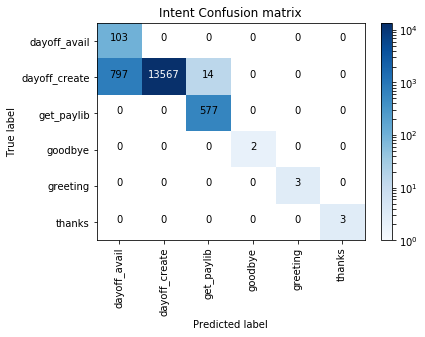

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [110]:
evaluate.run_evaluation('/Users/guolei/Documents/EIT/GUOLEI/ContextManager/data/rasa_testing_15066_1525095686936.json',model_directory)

In [59]:
##extract text from data
intent_targets = [e.get("intent") 
                 for e in testing_data.training_examples]
e = [e for e in testing_data.training_examples]
e[2].as_dict().get("text")

'je voudrais poser 2 jour de congés payés 20 fév 2018'

In [106]:
#### Evaluate the entity recognization ####
entity_predictions,tokens = evaluate.get_entity_predictions(interpreter,testing_data)
extractors = evaluate.get_entity_extractors(interpreter)
entity_targets = evaluate.get_entity_targets(testing_data)
evaluate.evaluate_entities(entity_targets,entity_predictions,tokens,extractors)


/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [107]:
evaluate.compute_entity_metrics(interpreter,testing_data)

/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


defaultdict(<function rasa_nlu.evaluate.compute_entity_metrics.<locals>.<lambda>>,
            {'ner_crf': defaultdict(list,
                         {'Accuracy': [0.6549502086436317],
                          'F1-score': [0.5183959898756165],
                          'Precision': [0.4289597758023368]})})